In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


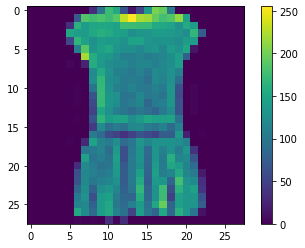

In [4]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

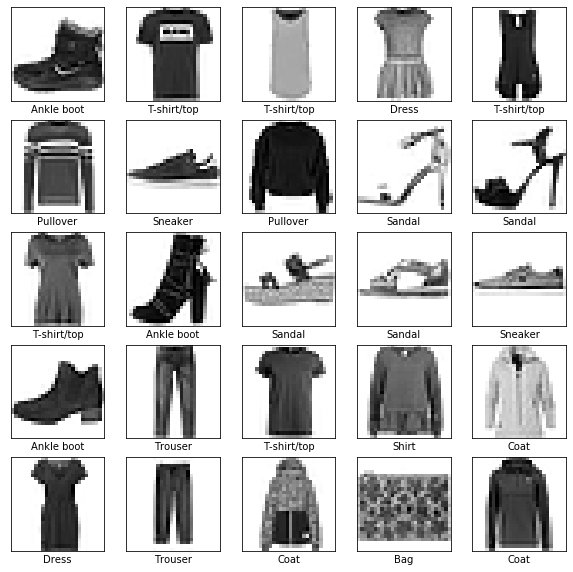

In [5]:
#Normalization. Image pixel값이 0~255 의 값을 가지기 떄문에 255.0 으로 나눠 0~1의 값을 가지도록 정규화 시킨다 
train_images=train_images/255.0
test_images=test_images/255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

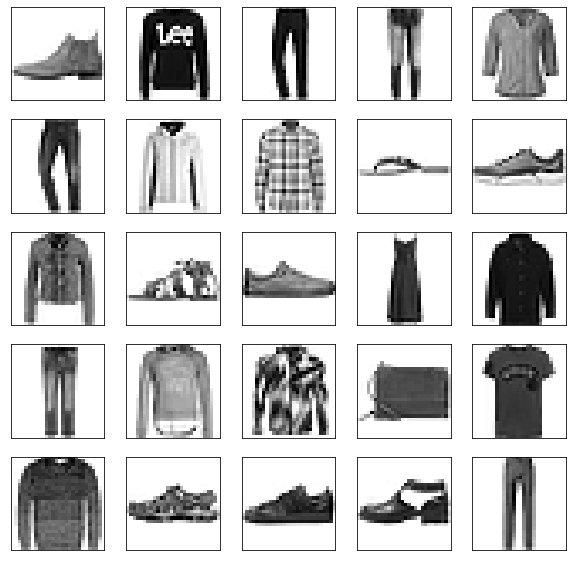

In [9]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2818 - accuracy: 0.8950
Epoch 2/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2700 - accuracy: 0.8996
Epoch 3/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2589 - accuracy: 0.9036
Epoch 4/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2495 - accuracy: 0.9075
Epoch 5/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2387 - accuracy: 0.9110


In [18]:
loss,acc = model.evaluate(test_images, test_labels,verbose=0)

print('Test accuracy:', acc)

Test accuracy: 0.8767
